In [1]:
from utils import LDA

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
lda = LDA(
    texts_query="""
        SELECT
            anime_id,
            synopsis
        FROM animes_catalog c;
    """,
    texts_col="synopsis"
)

Executing query 
        SELECT
            anime_id,
            synopsis
        FROM animes_catalog c;
    


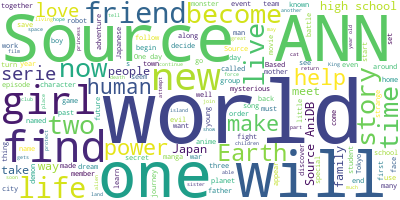

In [3]:
lda.get_words_cloud()

In [4]:
lda.train_model(
    extra_stop_words=[
        "source",
        "one",
        "two",
        "three",
        "world",
        "new",
        "now",
        "episode",
        "episodes",
        "also",
        "however",
        "even",
        "dvd",
        "school",
        "anime",
        "source",
        "anidb",
        "animation",
        "must",
        "another",
        "ann"
    ],
    num_topics=3
)

In [5]:
lda.get_topics_graphics()

In [6]:
df_synopsis = lda.predict_topics()
df_synopsis.head()

,anime_id,synopsis,synopsis_topic_1,synopsis_topic_2,synopsis_topic_3
0,2904,"One year has passed since the Black Rebellion,...",0.108942,0.703832,0.187226
1,32324,promotional video for the third compiled volum...,0.022104,0.021244,0.956652
2,9361,olly Star-Racer is a pilot music video/product...,0.482008,0.039142,0.478850
3,29501,Cats play baseball at night. When their ball g...,0.785992,0.186334,0.027674
4,30425,"usic video for ‘Wake Up! Dodo’, from the album...",0.858356,0.061380,0.080264


In [7]:
lda.upload_topics()

Executing query 
            DROP TABLE IF EXISTS animes_catalog_synopsis_topics;

            CREATE TABLE animes_catalog_synopsis_topics (
                synopsis_topics_id INT GENERATED ALWAYS AS IDENTITY,
                anime_id INT NOT NULL,

                primary key(synopsis_topics_id),
                foreign key(anime_id)
                references animes_catalog(anime_id)
            );
        
Executing query 
                ALTER TABLE animes_catalog_synopsis_topics
                ADD synopsis_topic_1 DECIMAL(16, 4) NOT NULL;
            
Executing query 
                ALTER TABLE animes_catalog_synopsis_topics
                ADD synopsis_topic_2 DECIMAL(16, 4) NOT NULL;
            
Executing query 
                ALTER TABLE animes_catalog_synopsis_topics
                ADD synopsis_topic_3 DECIMAL(16, 4) NOT NULL;
            
Executing query 
                    INSERT INTO animes_catalog_synopsis_topics (anime_id, synopsis_topic_1, synopsis_topic_2, synopsi